<div align="center">
<h1><font size="7">Loop Q Prize</font></h1>
<h2><font size="5">Challenge B: Crop Yield Prediction</font></h2>
<font size="4">Alexandros P. Pouroullis</font>
</div>

# Data Exploration

In [436]:
import numpy as np
import pandas as pd

In [437]:
# Gathering training and test data
train_data_path = 'challengeB_data/2022challengeB_train.csv'
test_data_path = 'challengeB_data/2022challengeB_test.csv'
train_df = pd.read_csv(train_data_path, index_col=[0])
# Shuffling the data frame
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = pd.read_csv(test_data_path, index_col=[0])

train_df.head()

,country,crop_item,year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,YIELD
0,India,"Rice, paddy",2005,1083.0,35342.00,25.82,31537
1,Mexico,Wheat,2009,758.0,61690.08,17.03,49688
2,Greece,"Rice, paddy",2004,652.0,11594.00,18.07,71038
3,Canada,Soybeans,2009,537.0,54529.40,7.12,25371
4,India,Sweet potatoes,2001,1083.0,43720.04,26.90,88368


<font size=3>I shuffled the training data frame so that the countries' data no longer appear in contiguous blocks. This is important to do before training so that the distribution of data in each batch is somewhat similar to the distribution of the data in the full dataset.</font>

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        25723 non-null  object 
 1   crop_item                      25723 non-null  object 
 2   year                           25723 non-null  int64  
 3   average_rain_fall_mm_per_year  25723 non-null  float64
 4   pesticides_tonnes              25723 non-null  float64
 5   avg_temp                       25723 non-null  float64
 6   YIELD                          25723 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.4+ MB


<font size=3>The data has 6 features, 1 target value, and a total of 25723 samples.</font>

<table style="width:100%">
    <thead>
        <th style="text-align:center">Target Value</th>
        <th style="text-align:center">Generic Data Type</th>
    </thead>
    <tbody>
        <tr>
            <td style="text-align:center">Crop Yield (Hectograms/Hectare)</td>
            <td style="text-align:center">Numerical</td>
        </tr>
    </tbody>
</table>

<font size=3>The data consist of a mixture of both continuous and nominal (categorical with no order) data. The nominal data will need to be encoded later on in the preprocessing phase so that it can be used along with the continuous data. It can also be seen that the value that the model will predict is continuous, meaning that the problem at hand is one of regression.</font>

In [7]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,25723.0,2000.471446,6.455219,1990.00,1995.0,2000.0,2006.00,2011.00
average_rain_fall_mm_per_year,25723.0,1148.768145,709.957717,51.00,593.0,1083.0,1668.00,3240.00
pesticides_tonnes,25723.0,35558.519387,55396.265253,0.04,1753.2,17182.0,46195.00,345026.00
avg_temp,25723.0,20.516346,6.309580,1.30,16.7,21.5,25.97,30.32
YIELD,25723.0,75838.054348,83683.317016,50.00,19584.0,37418.0,104001.00,501412.00


<font size=3>The above table displays a summary of the continuous data. We can see that the first year present in the data is 1990 and the data ends in 2011. There's also incredibly high variance amongst the scales of the variables which will have to be addressed with scaling in the preprocessing phase.</font>

In [21]:
train_df.isnull().sum()

country                          0
crop_item                        0
year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
YIELD                            0
dtype: int64

<font size=3>None of the columns contain null values, so there's no need to perform any cleaning.</font>

In [37]:
npArray = np.array(train_df["crop_item"])
for crop in np.unique(npArray):
    print(crop)

Cassava
Maize
Plantains and others
Potatoes
Rice, paddy
Sorghum
Soybeans
Sweet potatoes
Wheat
Yams


In [141]:
train_df.groupby("crop_item")["crop_item"].count().sort_values(ascending=False)

crop_item
Potatoes                3894
Maize                   3753
Wheat                   3515
Rice, paddy             3088
Soybeans                2936
Sorghum                 2761
Sweet potatoes          2634
Cassava                 1867
Yams                     769
Plantains and others     506
Name: crop_item, dtype: int64

<font size=3>Just as was the case with the countries, the different crops also have vastly different representations, which may result in further bias towards those crops that were represented better in the dataset. </font>

## Visualising the Variables

<font size=3>In this next part, I explore each individual variable by visualising their frequencies, in the case of nominal data, or their distributions, in the case of continuous data.</font>

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
plt.rcParams.update({'font.family': 'Arial'})

<ipython-input-245-909701a35774>:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([]);


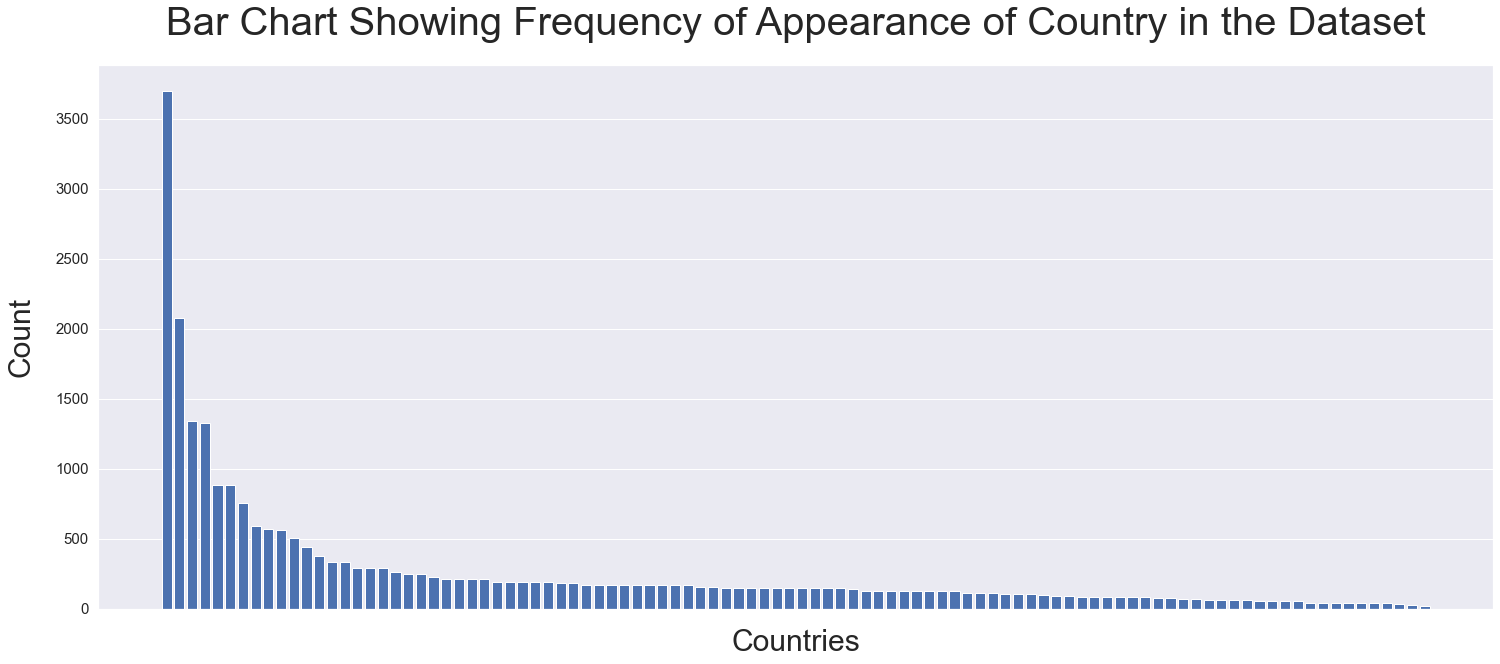

In [245]:
fig, ax = plt.subplots(figsize=(25, 10))
country_data = train_df.groupby("country")["country"].count().sort_values(ascending=False)
ax.set_title("Bar Chart Showing Frequency of Appearance of Country in the Dataset", pad=30, fontsize=40)
ax.bar(country_data.index, country_data.values, color="b")
ax.set_xlabel(xlabel="Countries", labelpad=20, fontsize=30)
ax.set_ylabel(ylabel="Count", labelpad=20, fontsize=30)
ax.tick_params(axis="y", labelsize=15)
ax.set_xticks([]);

<font size=3>The above visual demonstrates the imbalance in representation of countries in the dataset.</font>

In [68]:
most_represented_countries = list(train_df.groupby("country")["YIELD"].sum().nlargest(5).keys())
list_true_false = [country in most_represented_countries for country in train_df["country"]]
train_df2 = train_df[list_true_false]

<font size=3>Above, I create a new data frame based off of the original data frame, but that only contains the data for the 5 most represented countries, to make some visualisations easier to analyse.</font>

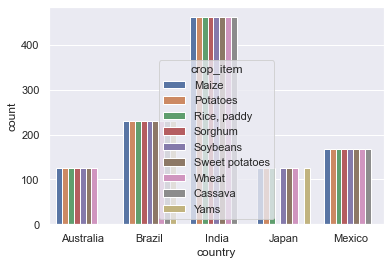

In [113]:
sns.countplot(x="country", data=train_df2, hue="crop_item");

<font size=3>It seems the representation of each crop for each country is, for the most part, equal though there are some cases where there's no data for particular crops, as can be seen with Japan in the above visual, or there's an imbalance. I checked the value counts of crops for each country and found this to be true majority of the time. This will make training a little bit easier, as no one crop will sway the results for each country. Though globally there is an imbalance in the representation of crops, demonstrated below, which may need to be addressed.</font>

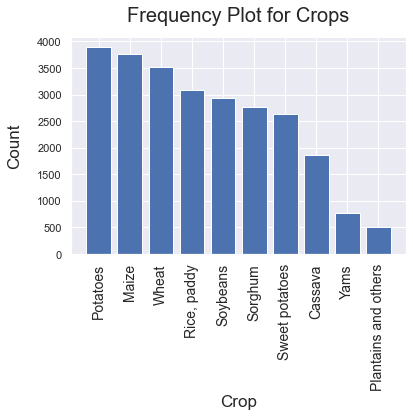

In [110]:
frequency_table = train_df["crop_item"].value_counts()
data = {"crop_item": frequency_table.index, "count": frequency_table}
new_df = pd.DataFrame(data)
new_df.reset_index(drop=True, inplace=True)

plt.bar(new_df["crop_item"], new_df["count"], color="b")
plt.title("Frequency Plot for Crops", fontsize=20, pad=15)
plt.xlabel("Crop", fontsize=17)
plt.ylabel("Count", fontsize=17, labelpad=15)
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [221]:
def scatter_plot(x, y, ax):
    """Produces a custom labeled scatter plot using matplotlib"""
    ax.scatter(x, y, alpha=0.1)
    return ax

def histogram(x, ax, nbins):
    """Produces a custom labeled histogram using matplotlib"""
    ax.hist(x, bins=nbins)
    return ax

def violinplot(x, ax):
    """Produces a horizontal box and whisker diagram using matplotlib"""
    # setting vert to False produces a horizontal box and whisker diagram
    ax.violinplot(x, vert=False, showmedians=True)
    return ax

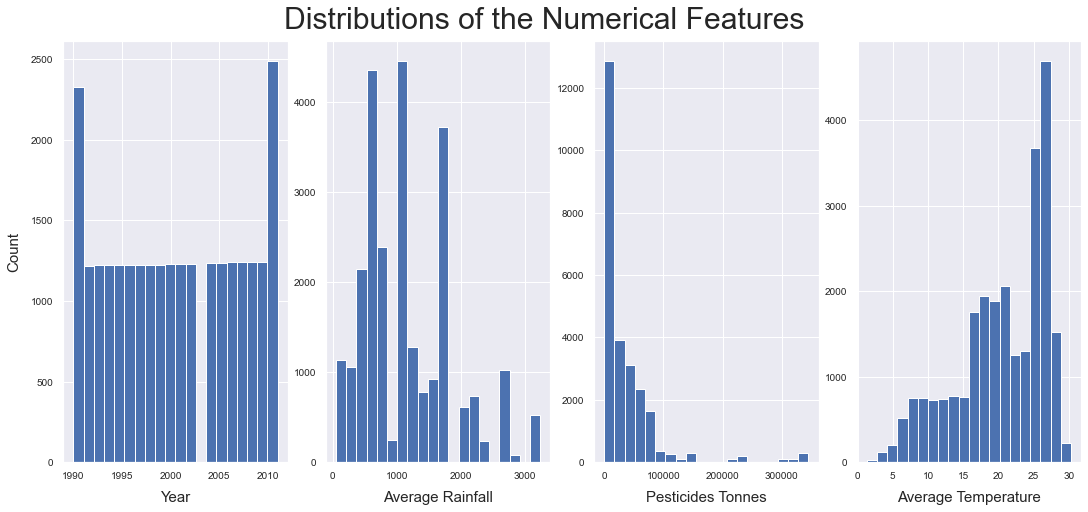

In [244]:
fig, ax = plt.subplots(nrows=1, ncols=4, constrained_layout=True, figsize=(15, 7))
fig.suptitle("Distributions of the Numerical Features", fontsize=30)

for axes in ax.flatten():
    axes.tick_params(axis="x", labelsize=10)
    axes.tick_params(axis="y", labelsize=10)

nbins = 20

ax[0].set_xlabel("Year", labelpad=10, fontsize=15)
ax[0].set_ylabel("Count", labelpad=10, fontsize=15)
histogram(train_df["year"], ax[0], nbins=nbins)

ax[1].set_xlabel("Average Rainfall", labelpad=10, fontsize=15)
histogram(train_df["average_rain_fall_mm_per_year"], ax[1], nbins=nbins)

ax[2].set_xlabel("Pesticides Tonnes", labelpad=10, fontsize=15)
histogram(train_df["pesticides_tonnes"], ax[2], nbins=nbins)

ax[3].set_xlabel("Average Temperature", labelpad=10, fontsize=15)
histogram(train_df["avg_temp"], ax[3], nbins=nbins);

<font size=3>Now, let's look at the target value and try to find some correlations with the input data.</font>

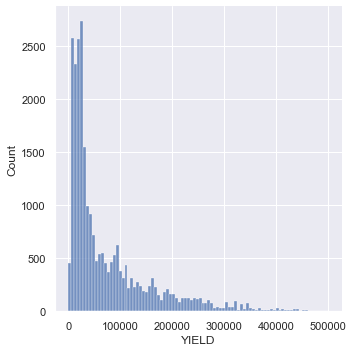

In [579]:
sns.displot(train_df["YIELD"]);

In [247]:
train_df["YIELD"].describe()

count     25723.000000
mean      75838.054348
std       83683.317016
min          50.000000
25%       19584.000000
50%       37418.000000
75%      104001.000000
max      501412.000000
Name: YIELD, dtype: float64

<font size=3>A neat way to visualize correlations is by using heatmaps. I'll create one with the continuous input features to try and see if there's any linear relationship between them and the crop yield.</font>

<AxesSubplot:>

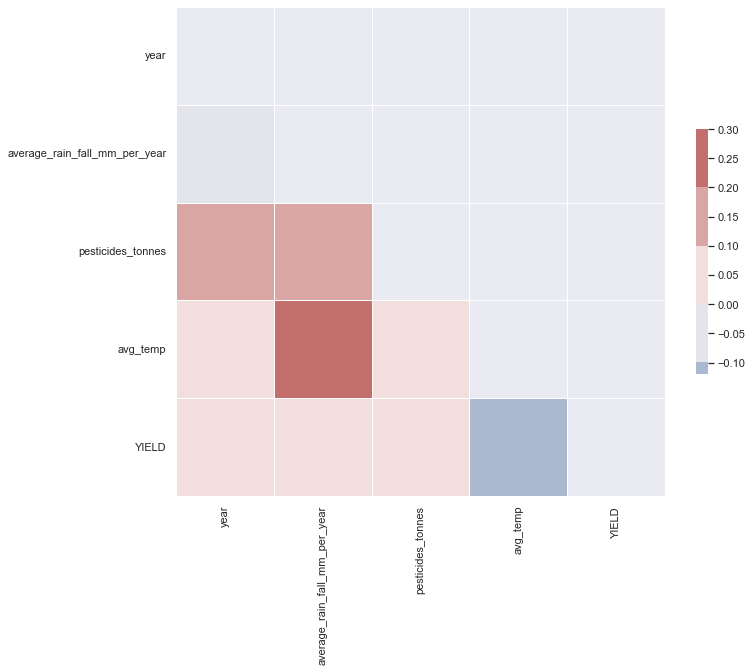

In [277]:
correlation_data = train_df.select_dtypes(include=[np.number]).corr()
mask = np.zeros_like(correlation_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.color_palette("vlag")

sns.heatmap(data=correlation_data, cmap=cmap, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

<font size=3>There's no meaningful correlation amongst the variables.<br>
<br>
There isn't much more that needs to be explored within the data, so I'll move on to comparing models.</font>

# Data Preprocessing

<h3>Training Data</h3>

In [438]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [439]:
train_df_onehot = pd.get_dummies(train_df, columns=["country", "crop_item"], prefix=["Country", "Crop_Item"])
train_target = train_df_onehot.pop("YIELD")
train_features = train_df_onehot

train_features.head()

,year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Crop_Item_Cassava,Crop_Item_Maize,Crop_Item_Plantains and others,Crop_Item_Potatoes,"Crop_Item_Rice, paddy",Crop_Item_Sorghum,Crop_Item_Soybeans,Crop_Item_Sweet potatoes,Crop_Item_Wheat,Crop_Item_Yams
0,2005,1083.0,35342.00,25.82,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2009,758.0,61690.08,17.03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2004,652.0,11594.00,18.07,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2009,537.0,54529.40,7.12,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2001,1083.0,43720.04,26.90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<font size=3>Some machine learning algorithms can't deal with categorical data, so they must be encoded into numbers in order to be fed as input into the algorithm. I use one-hot encoding as opposed to something like integer encoding (where the categorical data is encoded into integers in ascending order), because the former doesn't assume some order in the categorical data. Country and crop item are not ordinal data, and, therefore, should not be encoded into numbers that assume an order, hence why one-hot encoding is used.</font>

In [440]:
# general scaler that doesn't need to be reaccessed after scaling.
scaler = MinMaxScaler()

# This normalizer will be used at the beginning of the keras.Sequential() model, which removes the inconvenience
# of having to scale the data before passing it into the model.
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

scaled_train_features = scaler.fit_transform(train_features)

<font size=3>The scaling I use is simple min-max scaling. The formula is as follows:</font><br>
<div align="center"><font size=4>$x_{scaled}=\frac{x-x_{min}}{x_{max}-x_{min}}$</font></div>
<font size=3>
This translates all the data into the range [0, 1] which is important for some algorithms, because some of them show bias towards data with greater magnitudes. And this is especially important in this dataset's case, as there's great variance in the scales of the features, as was demonstrated earlier.
</font>

In [262]:
scaled_train_features

array([[0.04761905, 0.1392286 , 0.04806004, ..., 0.        , 1.        ,
        0.        ],
       [0.19047619, 0.32361242, 0.17783288, ..., 1.        , 0.        ,
        0.        ],
       [0.04761905, 0.32361242, 0.20906531, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.0952381 , 0.13891502, 0.01599288, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.69896519, 0.01429461, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.62715585, 0.00263653, ..., 0.        , 0.        ,
        0.        ]])

<font size=3>We can see that the data, now represented as a numpy ndarray, is all within the range [0, 1]</font>

<h3>Testing Data</h3>

In [263]:
test_df.head()

,country,crop_item,year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,predicted_YIELD
0,Albania,Maize,2012,1485.0,766.25,16.70,NaN
1,Albania,Potatoes,2012,1485.0,766.25,16.70,NaN
2,Albania,Soybeans,2012,1485.0,766.25,16.70,NaN
3,Albania,Wheat,2012,1485.0,766.25,16.70,NaN
4,Albania,Maize,2013,1485.0,982.32,17.41,NaN


<font size=3>Just as I did with the training data set, I'll one-hot encode the categorical data in the test dataset.</font>

In [441]:
test_df_onehot = pd.get_dummies(test_df, columns=["country", "crop_item"], prefix=["Country", "Crop_Item"])
test_features = test_df_onehot.loc[:, test_df_onehot.columns != "predicted_YIELD"]

In [178]:
print("Number of features in the training data set:", train_features.shape[1])
print("Number of features in the testing data set:", test_features.shape[1])

Number of features in the training data set: 114
Number of features in the testing data set: 115


<font size=3>What I notice with this dataframe is that it contains one more feature than the training dataset. I suspect that it has to do with there being one more category in either the countries or crop items, which, after being one-hot encoded, would've resulted in one more column being made to account for the extra category. I'll check both these features to verify this.</font>

In [179]:
num_crop_items_train = len(train_df["crop_item"].unique())
num_countries_train = len(train_df["country"].unique())
num_crop_items_test = len(test_df["crop_item"].unique())
num_countries_test = len(test_df["country"].unique())
                          
print("Number of unique crop items in the training data set:", num_crop_items_train)
print("Number of unique crop items in the testing data set:", num_crop_items_test)
print()
print("Number of unique countries in the training data set:", num_countries_train)
print("Number of unique countries in the testing data set:", num_countries_test)

Number of unique crop items in the training data set: 10
Number of unique crop items in the testing data set: 10

Number of unique countries in the training data set: 100
Number of unique countries in the testing data set: 101


<font size=3>My suspicions were correct: there is one more country in the testing data set. I'll find the country by checking the difference between the unique countries of the training and testing data sets.</font>

In [61]:
# Python's set data container can be used to store unique data. It provides the useful
# method of being able to find the difference between two sets using the difference() method.
ls_countries_train = set(train_df["country"].unique())
ls_countries_test = set(test_df["country"].unique())
ls_countries_test.difference(ls_countries_train)

{'Sudan'}

<font size=3>It appears that Sudan is the one country that the testing data set has that the training data set does not.</font>

<font size=3>This poses an issue, because after one-hot encoding, the data sets have a differing number of features, which makes it impossible to use the model fitted to the training data to be tested on the testing data.<br>
<br>
There are a number of ways that this can be dealt with. One option is to add an additional country column to the training data named *Country_Sudan* and then set all the values in that column to 0, because, of course, there's no instance in the training data set in which the country is Sudan. <br>
<br>
Alternatively, one might think that a more generalizable solution would be to get a list of all the countries in the world and then add columns for each country. This would be a much better improvement on the previous option, because then the model could be generalized to any country. However, this would just present the algorithm with many meaningless features. And in any case, it wouldn't make sense to add these new features, as the model would be fitted to data not containing instances in which any of the newly added countries are present. Thus, in the real world, one would have to retrain the network on data with new countries before making predictions on the new countries.<br>
<br>
Or perhaps the problem can be made much simpler: why not just remove the country as a feature entirely? I made a (questionably) educated guess at the beginning of this document that the country would have minimal significance in determining crop yields. This would also then reduce the feature space after one-hot encoding substantially. However, my presumption may be unfounded, and I'd rather not go on training algorithms on it. So I'll instead perform an experiment and empirically determine if the country is indeed trivial in making predicitions of crop yields.

<h3>Creating a training data set without the country feature to determine if it is truly negligible</h3>

In [372]:
country_columns = [column for column in train_features.columns if "Country" in column]
train_features_without_country = train_features.drop(country_columns, axis=1)

scaled_train_features_without_country = scaler.fit_transform(train_features_without_country)
normalizer_without_country = layers.Normalization(axis=-1)
normalizer_without_country.adapt(np.array(train_features_without_country))

train_features_without_country.shape

(25723, 14)

The number of features is now 14, indicating that the countries were successfully removed from the *train_features*.

<h2>Testing if the country has neglibible effect in determining crop yields</h2>

In [442]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [373]:
x = scaled_train_features
x_without_country = scaled_train_features_without_country
y = train_target

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [220]:
rf = RandomForestRegressor(random_state=42)
rf_score_with_all_features = cross_val_score(rf, x, 
                                     y, 
                                     cv=kfold, 
                                     scoring="neg_root_mean_squared_error",  
                                     n_jobs=-1,
                                     verbose=1)

rf_score_without_country = cross_val_score(rf, x_without_country, 
                                        y, 
                                        cv=kfold, 
                                        scoring="neg_root_mean_squared_error", 
                                        n_jobs=-1,
                                        verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   30.5s remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   43.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    9.7s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.2s finished


In [374]:
def get_rmse(rmse_arr):
    average_rmse = round(-rmse_arr.mean())
    
    return average_rmse

In [221]:
rf_rmse_with_all_features = get_rmse(rf_score_with_all_features)
rf_rmse_without_country = get_rmse(rf_score_without_country)


print("Random Forest Regressor")
print('-'*30)
print("RMSE with all features:", rf_rmse_with_all_features)
print("RMSE without the countries:", rf_rmse_without_country)

Random Forest Regressor
------------------------------
RMSE with all features: 8648
RMSE without the countries: 9994


In [375]:
lr = LinearRegression()
lr_score_with_all_features = cross_val_score(lr, x, y, cv=kfold, 
                                             scoring="neg_root_mean_squared_error", n_jobs=-1, verbose=1)
lr_score_without_country = cross_val_score(lr, x_without_country, y, cv=kfold, 
                                           scoring="neg_root_mean_squared_error", n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [376]:
lr_rmse_with_all_features = get_rmse(lr_score_with_all_features)
lr_rmse_without_country = get_rmse(lr_score_without_country)

print("Linear Regression")
print('-'*30)
print("RMSE with all features:", lr_rmse_with_all_features)
print("RMSE without country:", lr_rmse_without_country)

Linear Regression
------------------------------
RMSE with all features: 41215
RMSE without country: 49743


<font size=3>My hypothesis that the country has negligible impact in determining crop yields was clearly proven wrong. We can see that when the data excluded the country, the root-mean-squared error was higher by a somewhat significant margin. I will include country as a feature, but in order to do so, the number of features that the model will be fitted on must match the number of features that the model will be tested on.<br>
So, what I will do is append Sudan as a column and set the values for each case to be 0 for it, because, of course, there's no instance in the dataset in which Sudan is present.
</font>

<h3>Adding only Sudan to the training data</h3>

In [443]:
train_features["Country_Sudan"] = np.zeros(len(train_features.index), dtype=np.uint8)
train_features.shape

(25723, 115)

In [444]:
scaled_train_features = scaler.fit_transform(train_features)

normalizer = layers.Normalization(axis=-1)
normalizer.adapt(train_features)

In [229]:
score = cross_val_score(rf, 
                        scaled_train_features, 
                         y, 
                         cv=kfold, 
                         scoring="neg_root_mean_squared_error",  
                         n_jobs=-1,
                         verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   31.0s remaining:   20.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   44.7s finished


In [231]:
print("RMSE after adding Sudan as a category:", get_rmse(score))

RMSE after adding Sudan as a category: 8660


<font size=3>Interestingly, adding Sudan as a category very slightly adversely affected the performance of the model.</font>

<h1>Comparing Models</h1>

In [445]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [446]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [447]:
full_model_names = {"RF": "Random Forest",
                      "LR": "Linear Regression",
                      "SVM":"Support Vector Machine",
                      "KNN": "K-Nearest Neighbours",
                      "GB":"Gradient Boosting",
                      "XGB":"XGBoost",
                      "ADA": "AdaBoost",
                      "DNN":"Deep Neural Network"}

def train_models_and_get_results(models, X, y, scoring):
    """Trains models passed and returns the results for them as a dictionary.
    Parameters: 
        models - dictionary of machine learning algorithms; key=algorithm name, value=model
        X - 2d array of features
        y - 1d array representing target values
        scoring - The scoring metric as defined by the sklearn documentation.
    """
    
    model_results = {}
    for name, model in models.items():
        # k-fold cross-validation with 10 folds.
        kfold = KFold(n_splits=10)
        
        print(f"Training {full_model_names[name]}...")
        cv_results = cross_val_score(model, X, y, cv=kfold, n_jobs=-1, scoring=scoring)
        print("Training complete")
        
        model_results[name] = get_rmse(cv_results)
        
        print(f"RMSE: {model_results[name]}\n")
        
    
    return model_results

def plot_results(model_results):
    model_results = dict(sorted(model_results.items(), key=lambda x: x[1]))
    
    width = 0 
    for name in model_results.keys():
        model_name = full_model_names[name] + f" ({name})"
        width = max(width, len(model_name))
    
    print("Model Results (RMSE)")
    print('-'*30)
    for name, score in model_results.items():
        model_name = full_model_names[name] + f" ({name})"
        results = "{model_name:<{width}}: {score}".format(model_name=model_name, width=width, score=score)
        print(results)
    
    
    fig, ax = plt.subplots(figsize=(5, 5))
    model_names = list(model_results.keys())
    model_scores = list(model_results.values())
    data = {"names": model_names, "scores": model_scores}
    sns.barplot(x="names", y="scores", data=data, ax=ax, palette=sns.color_palette("mako", len(model_results)))
    ax.set_title("Model Results Comparison", fontsize=20)
    ax.set_xticklabels(model_results.keys())
    ax.set_xlabel("Models", fontsize=15)
    ax.set_ylabel("RMSE (Hectograms/Hectare)", fontsize=15)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10);

In [410]:
models = {}
models["RF"] = RandomForestRegressor(n_jobs=-1)
models["LR"] = LinearRegression()
models["SVM"] = SVR()
models["GB"] = GradientBoostingRegressor()
models["KNN"] = KNeighborsRegressor()
models["XGB"] = XGBRegressor(n_jobs=-1)
models["ADA"] = AdaBoostRegressor()

model_results = train_models_and_get_results(models, scaled_train_features, train_target, scoring="neg_root_mean_squared_error")

Training Random Forest...
Training complete
RMSE: 8687

Training Linear Regression...
Training complete
RMSE: 41200

Training Support Vector Machine...
Training complete
RMSE: 91660

Training Gradient Boosting...
Training complete
RMSE: 29476

Training K-Nearest Neighbours...
Training complete
RMSE: 9157

Training XGBoost...
Training complete
RMSE: 12890

Training AdaBoost...
Training complete
RMSE: 62136



In [427]:
def build_and_compile_model():
    model = keras.Sequential([
        normalizer,
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1)
    ])
    
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.1,
            decay_steps=100,
            decay_rate=0.98
    )
    
    model.compile(optimizer=keras.optimizers.Adam(0.1),
                 loss="mean_squared_error",
                 metrics=keras.metrics.RootMeanSquaredError())
    
    model.summary()
    
    return model

def fit_model(model):
    num_epochs = 50
    print(f"Training neural network for {num_epochs} epochs...")
    history = model.fit(train_features,
                       train_target,
                       epochs=num_epochs,
                       validation_split=0.2,
                       verbose=0)
    print("Training complete")
    
    error_arr = np.array(history.history["val_root_mean_squared_error"])
    min_elements = np.array([])
    for index in error_arr.argsort()[:3]:
        min_elements = np.append(min_elements, error_arr[index])
    rmse = round(min_elements.mean())
    print(f"RMSE: {rmse}")
    
    print(np.array)
    return history

In [419]:
model = build_and_compile_model()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliza  (None, 115)              231       
 tion)                                                           
                                                                 
 dense_34 (Dense)            (None, 128)               14848     
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 dense_36 (Dense)            (None, 1)                 129       
                                                                 
Total params: 31,720
Trainable params: 31,489
Non-trainable params: 231
_________________________________________________________________


In [428]:
dnn_history = fit_model(model)

Training neural network for 50 epochs...
Training complete
RMSE: 9370
<built-in function array>


In [433]:
error_arr = np.array(dnn_history.history["val_root_mean_squared_error"])
min_elements = np.array([])
for index in error_arr.argsort()[:3]:
    min_elements = np.append(min_elements, error_arr[index])
rmse = round(min_elements.mean())
model_results["DNN"] = rmse

Model Results (RMSE)
------------------------------
Random Forest (RF)          : 8687
K-Nearest Neighbours (KNN)  : 9157
Deep Neural Network (DNN)   : 9370
XGBoost (XGB)               : 12890
Gradient Boosting (GB)      : 29476
Linear Regression (LR)      : 41200
AdaBoost (ADA)              : 62136
Support Vector Machine (SVM): 91660


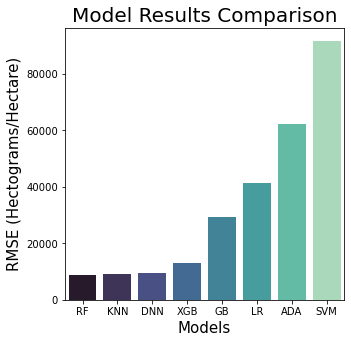

In [448]:
plot_results(model_results)

<font size=3>The 3 algorithms that performed best were, from best to worst, the random forest, k-nearest neighbors, and deep neural network. They were all tested in their default implementation or in a simple state, so I will try tune them all further and see how they perform in their most optimal form.<br>
<br>
Since the pool of models I'm now comparing has diminished, I will validate each model more thoroughly by using repeated k-fold cross-validation for the sklearn models and training the neural network over more epochs.</font>

<h1>Fine-Tuning the Best Models</h1>

In [592]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [604]:
num_folds = 10
def get_score(estimator):
    """Returns a numpy array containing the rmse achieved by an estimator for each iteration 
    of cross-validation."""
    kfold = KFold(n_splits=num_folds, random_state=42, shuffle=True)
    return cross_val_score(estimator, 
                           scaled_train_features,
                           train_target,
                           cv=kfold,
                           scoring="neg_root_mean_squared_error",
                           n_jobs=-1)

<h2>Random Forest</h2>

<font size=3>The approach I usually employ when tuning the hyperparameters of sklearn models is that I perform some number of evaluations of randomized combinations of hyperparameters and save the combination that performed best.</font>

In [455]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<font size=3>The above output shows the hyperparameters of the random forest as well as their default values. I referenced this article to discern how each parameter affects performance: https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/<br>
<br>
Below I collect the scores of the model trained on differing values of hyperparameters with all other hyperparameters held constant, so that I can find the most optimal values of them to implement in the final model. An alternative would be to run an exhaustive search, but that method would take too much time, so instead, I use some a priori knowledge to speed up the process.</font>

<h3>Number of estimators</h3>

In [558]:
n_estimators_scores = {}
for num_estimators in range(100, 1000, 100):
    print(f"Training random forest with {num_estimators} estimators...")
    
    rf = RandomForestRegressor(n_estimators=num_estimators)
    scores = get_score(rf)
    
    n_estimators_scores[num_estimators] = -scores.mean()
    print("RMSE:", -scores.mean())
    
    print("Completed\n")

Training random forest with 100 estimators...
RMSE: 10709.0241193724
Completed

Training random forest with 200 estimators...
RMSE: 10591.293991088261
Completed

Training random forest with 300 estimators...
RMSE: 10661.15360321313
Completed

Training random forest with 400 estimators...
RMSE: 10613.013445668737
Completed

Training random forest with 500 estimators...
RMSE: 10632.344731892055
Completed

Training random forest with 600 estimators...
RMSE: 10601.030434280921
Completed

Training random forest with 700 estimators...
RMSE: 10611.118968633436
Completed

Training random forest with 800 estimators...
RMSE: 10607.362427464323
Completed

Training random forest with 900 estimators...
RMSE: 10647.183917778731
Completed



<h3>Max depth</h3>

In [481]:
max_depth_scores = {}
for depth in range(10, 80, 5):
    print(f"Training random forest with a max depth of {depth}...")
    
    rf = RandomForestRegressor(max_depth=depth)
    scores = get_score(rf)
    
    max_depth_scores[depth] = -scores.mean()
    
    print("Completed\n")

Training random forest with a max depth of 10...
Completed

Training random forest with a max depth of 15...
Completed

Training random forest with a max depth of 20...
Completed

Training random forest with a max depth of 25...
Completed

Training random forest with a max depth of 30...
Completed

Training random forest with a max depth of 35...
Completed

Training random forest with a max depth of 40...
Completed

Training random forest with a max depth of 45...
Completed

Training random forest with a max depth of 50...
Completed

Training random forest with a max depth of 55...
Completed

Training random forest with a max depth of 60...
Completed

Training random forest with a max depth of 65...
Completed

Training random forest with a max depth of 70...
Completed

Training random forest with a max depth of 75...
Completed



<h3>Bootstrap state</h3>

In [506]:
bootstrap_scores = {}
bootstrap_states = [True, False]
for bootstrap_state in bootstrap_states:
    print("Training random forest " + ("with" if bootstrap_state == True else "without") + " boostrapping...") 
    
    rf = RandomForestRegressor(bootstrap=bootrstrap_state)
    scores = get_score(rf)
    
    bootstrap_scores[bootstrap_state] = -scores.mean()
    print("RMSE:", -scores.mean())
    
    print("Completed\n")
    

Training random forest with boostrapping...
9161.75046000036
Completed

Training random forest without boostrapping...
9181.048651768015
Completed



<h3>Minimum samples for split</h3>

In [511]:
min_samples_split_scores = {}
for min_samples_split in range(2, 10, 1):
    print(f"Training random forest with a minimum sample split of {min_samples_split}...")
    
    rf = RandomForestRegressor(min_samples_split=min_samples_split)
    scores = get_score(rf)
    print("RMSE:", -scores.mean())
    min_samples_split_scores[min_samples_split] = -scores.mean()
    
    print("Completed\n")

Training random forest with a minimum sample split of 2...
RMSE: 9165.928784535665
Completed

Training random forest with a minimum sample split of 3...
RMSE: 9231.677853808
Completed

Training random forest with a minimum sample split of 4...
RMSE: 9277.191597553947
Completed

Training random forest with a minimum sample split of 5...
RMSE: 9347.786067836609
Completed

Training random forest with a minimum sample split of 6...
RMSE: 9500.827181242083
Completed

Training random forest with a minimum sample split of 7...
RMSE: 9564.63647349709
Completed

Training random forest with a minimum sample split of 8...
RMSE: 9771.372855053642
Completed

Training random forest with a minimum sample split of 9...
RMSE: 10117.69765697028
Completed



<h3>Minimum samples for leaf</h3>

In [516]:
min_samples_leaf_scores = {}
for min_samples_leaf in range(1, 20, 2):
    print(f"Training random forest with a minimum samples per leaf of {min_samples_leaf}...")
    
    rf = RandomForestRegressor(min_samples_leaf=min_samples_leaf)
    scores = get_score(rf)
    print("RMSE:", -scores.mean())
    min_samples_leaf_scores[min_samples_leaf] = -scores.mean()
    
    print("Completed\n")

Training random forest with a minimum samples per leaf of 1...
RMSE: 10641.987161108918
Completed

Training random forest with a minimum samples per leaf of 3...
RMSE: 12348.54886224027
Completed

Training random forest with a minimum samples per leaf of 5...
RMSE: 14356.351069368722
Completed

Training random forest with a minimum samples per leaf of 7...
RMSE: 15895.345937187476
Completed

Training random forest with a minimum samples per leaf of 9...
RMSE: 17451.277509902684
Completed

Training random forest with a minimum samples per leaf of 11...
RMSE: 19038.213981616216
Completed

Training random forest with a minimum samples per leaf of 13...
RMSE: 19930.55804562859
Completed

Training random forest with a minimum samples per leaf of 15...
RMSE: 20743.100574908487
Completed

Training random forest with a minimum samples per leaf of 17...
RMSE: 21763.632890586567
Completed

Training random forest with a minimum samples per leaf of 19...
RMSE: 22614.32353598391
Completed



<h3>Maximum number of features to consider at split</h3>

In [554]:
max_features_modes_scores = {}
# None for all features
max_features_modes = [None, 'sqrt']
for max_features_mode in max_features_modes:
    print(f"Training random forest with the maximum number of features considered at each split set to {max_features_mode}...")
    
    rf = RandomForestRegressor(max_features=max_features_mode, random_state=42)
    scores = get_score(rf)
    max_features_modes_scores[max_features_mode] = -scores.mean()
    print("RMSE:", -scores.mean())
    
    print("Completed\n")

Training random forest with the maximum number of features considered at each split set to None...
RMSE: 10601.743959694864
Completed

Training random forest with the maximum number of features considered at each split set to sqrt...
RMSE: 11212.906484635641
Completed



<h3>Plotting the results</h3>

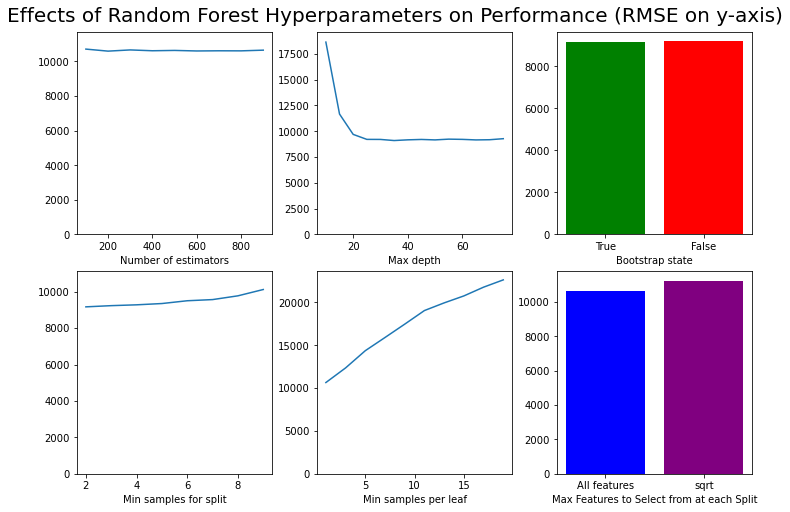

In [561]:
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
fig.suptitle("Effects of Random Forest Hyperparameters on Performance (RMSE on y-axis)", fontsize=20)

rows = 2
cols = 3

# Number of estimators
ax = fig.add_subplot(rows, cols, 1)
x = list(n_estimators_scores.keys())
y = list(n_estimators_scores.values())
ax.plot(x, y)
ax.set_ylim([0, max(y) + 1000])
ax.set_xlabel("Number of estimators")


# Max depth
ax = fig.add_subplot(rows, cols, 2)
x = list(max_depth_scores.keys())
y = list(max_depth_scores.values())
ax.set_ylim([0, max(y) + 1000])
ax.set_xlabel("Max depth")
ax.plot(x, y)

# Bootstrapping
ax = fig.add_subplot(rows, cols, 3)
x = [str(state) for state in list(bootstrap_scores.keys())]
y = list(bootstrap_scores.values())
ax.bar(x, y, color=["Green", "Red"])
ax.set_xlabel("Bootstrap state")

# Min samples split
ax = fig.add_subplot(rows, cols, 4)
x = list(min_samples_split_scores.keys())
y = list(min_samples_split_scores.values())
ax.set_ylim([0, max(y) + 1000])
ax.plot(x, y)
ax.set_xlabel("Min samples for split")

# Min samples per leaf
ax = fig.add_subplot(rows, cols, 5)
x = list(min_samples_leaf_scores.keys())
y = list(min_samples_leaf_scores.values())
ax.set_ylim([0, max(y) + 1000])
ax.plot(x, y)
ax.set_xlabel("Min samples per leaf")

# Max features mode
ax = fig.add_subplot(rows, cols, 6)
x = []
for max_features_mode in max_features_modes_scores.keys():
    if max_features_mode == None:
        x.append("All features")
    else:
        x.append(max_features_mode)
y = list(max_features_modes_scores.values())
ax.bar(x, y, color=["blue", "purple"])
ax.set_xlabel("Max Features to Select from at each Split");

<font size=3>The above plots show how the different hyperparameters affect the performance of the random forest. I'll use a combination of all the best hyperparameter values to implement in the final model.</font>

In [563]:
tuned_rf = RandomForestRegressor(n_estimators=200, 
                                 max_depth=25, 
                               bootstrap=True, 
                               min_samples_split=2,
                               min_samples_leaf=1,
                               max_features=1.0, 
                               random_state=42)
print("Training tuned random forest...")
tuned_rf_score = get_score(tuned_rf)
print("Training completed\n")


default_rf = RandomForestRegressor()
print("Training default random forest...")
default_rf_score = get_score(default_rf)
print("Training completed\n")

print("Tuned random forest score (RMSE):", -tuned_rf_score.mean())
print("Default random forest score (RMSE):", -default_rf_score.mean())

Training tuned random forest...
Training completed

Training default random forest...
Training completed

Tuned random forest score (RMSE): 8635.666665857916
Default random forest score (RMSE): 8599.512860161138


<font size=3>Tuning had no noticeable effect on performance. It seems Occam's razor prevails once again.</font>

<h2>K-Nearest Neighbours</h2>

In [598]:
knn = KNeighborsRegressor()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

<h3>Distance metrics</h3>

In [600]:
# The 'p' argument specifies the distance metric used. The default (p = 2) is the euclidean distance.
# p = 1 is the manhattan distance. Any arbitrary p value > 3 is used for the minkowski distance.

distance_metrics_scores = {}
distance_metrics = {1: "manhattan", 2:"euclidean", 3:"minkowski"}

# The default distance metric in the sklearn implementation of the k-nearest neighbours algorithm
# is the euclidean distance.
for i in range(1, 3+1):
    print(f"Training KNN using the {distance_metrics[i]} distance metric...")
    
    knn = KNeighborsRegressor(p=i, n_jobs=-1)
    score = get_score(knn, 10)
    
    distance_metrics_scores[distance_metrics[i]] = -score.mean()
    print("RMSE:", -score.mean())
    
    print("Completed\n")

Training KNN using the manhattan distance metric...
RMSE: 8874.65111089197
Completed

Training KNN using the euclidean distance metric...
RMSE: 9154.190116464673
Completed

Training KNN using the minkowski distance metric...
RMSE: 9232.55531261475
Completed



<h3>Weights</h3>

In [606]:
weight_functions_scores = {}
weight_functions = ["uniform", "distance"]

for weight_function in weight_functions:
    print(f"Training KNN with {weight_function} weight function...")
    
    knn = KNeighborsRegressor(n_jobs=-1, weights=weight_function)
    score = get_score(knn)
    print("RMSE:", -score.mean())
    weight_functions_scores[weight_function] = -score.mean()
    
    print("Completed\n")

Training KNN with uniform weight function...
RMSE: 9154.190116464673
Completed

Training KNN with distance weight function...
RMSE: 8055.526835046435
Completed



<h3>Number of neighbors</h3>

In [626]:
n_neighbors_scores = {}

print("Training models...")
for n_neighbors in range(2, 20, 1):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, n_jobs=-1)
    score = get_score(knn)
    n_neighbors_scores[n_neighbors] = -score.mean()
    
print("Training complete")

Training models...
Training complete


<h3>Plotting the results</h3>

In [669]:
color_palette = sns.color_palette("deep", n_colors=5)
color_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)]

In [648]:
import random

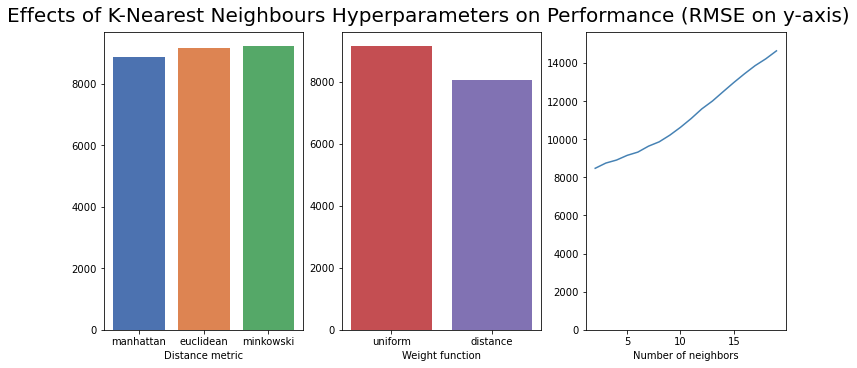

In [676]:
fig = plt.figure(figsize=(10, 5), constrained_layout=True)
fig.suptitle("Effects of K-Nearest Neighbours Hyperparameters on Performance (RMSE on y-axis)", fontsize=20)

rows = 1
cols = 3

# Distance metric
ax = fig.add_subplot(rows, cols, 1)
x = list(distance_metrics_scores.keys())
y = list(distance_metrics_scores.values())
ax.bar(x, y, color=color_palette[:3])
ax.set_xlabel("Distance metric")

# Weight function
ax = fig.add_subplot(rows, cols, 2)
x = list(weight_functions_scores.keys())
y = list(weight_functions_scores.values())
ax.bar(x, y, color=color_palette[-2:])
ax.set_xlabel("Weight function")

# Num neighbours
ax = fig.add_subplot(rows, cols, 3)
x = list(n_neighbors_scores.keys())
y = list(n_neighbors_scores.values())
ax.plot(x, y)
ax.set_ylim([0, max(y) + 1000])
ax.set_xlabel("Number of neighbors");

In [677]:
tuned_knn = KNeighborsRegressor(p=1, weights="distance", n_neighbors=2, n_jobs=-1)
tuned_knn_score = get_score(tuned_knn)

default_knn = KNeighborsRegressor(n_jobs=-1)
default_knn_score = get_score(default_knn)

print("Tuned KNN score (RMSE):", -tuned_knn_score.mean())
print("Default KNN score (RMSE):", -default_knn_score.mean())

Tuned KNN score (RMSE): 7928.161086035916
Default KNN score (RMSE): 9154.190116464673


<h2>Neural Network</h2

<h3>scikit-learn implementation</h3>

In [678]:
from sklearn.neural_network import MLPRegressor

In [ ]:
sklearn_nn = MLPRegressor()